# Transfer Learning

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
warnings.filterwarnings("ignore")

* Transfer learning is the idea of overcoming the isolated learning paradigm and utilizing knowledge acquired for one task to solve related ones.


* Transfer learning is an approach in deep learning (and machine learning) where knowledge is transferred from one model to another.


* **Def**: Model A is successfully trained to solve source task T.a using a large dataset D.a. However, the dataset D.b for a target task T.b is too small, preventing Model B from training efficiently. Thus, we use part of model A to predict results for task T.b.


* A common misconception is that training and testing data should come from the same source or be with the same distribution.



* Using transfer learning, we are able to solve a particular task using full or part of an already pre-trained model on a different task.


#### When to use transfer learning?


Transfer learning is becoming the go-to way of working with deep learning models. The reasons are explained below.


* Lack of data


* Deep learning models require a LOT of data for solving a task effectively. However, it is not often the case that so much data is available. For example, a company may wish to build a very specific spam filter to its internal communication system but does not possess lots of labelled data.



* In that case, a specific target task can be solved using a pre-trained model for a similar source task.



* The tasks can be different but their domains should be the same.



* In other words, you are unable to do transfer learning between speech recognition and image classification tasks since the input datasets are of different types.



* What you can do is using a pre-trained image classifier on dog photos to predict cat photos.



<img src="https://miro.medium.com/max/2400/1*Ww3AMxZeoiB84GVSRBr4Bw.png"/>


#### Speed



* Transfer learning cuts a large percentage of training time and allows for building various solutions instantly. In addition, it prevents from setting up a complex and costly Cloud GPU/TPU.



#### Social good



* Using transfer learning positively impacts the environment



## Transfer Learning Strategies:


#### Direct use of pre-trained models


* The simplest strategy is to solve a target task by directly applying a model from a source task.



* Such models are typically large (millions of parameters) neural networks, trained for days or even weeks on state-of-the-art machines.



* Big corporations (companies, universities etc.) tend to release such models to the public, aiming to enhance the development of this field.



* Some pre-trained models used directly include the aforementioned BERT as well as YOLO (You Only Look Once), GloVe, UnsupervisedMT and more.


#### Leveraging feature extraction from pre-trained models



* Instead of using the model end-to-end as in the previous example, we can treat the pre-trained neural network as a feature extractor by discarding the last fully-connected output layer.



* This approach allows us to directly apply new dataset to solve an entirely different problem.


It brings 2 main advantages:


* Allows for specifying the dimensions of the last fully-connected layer.


* For example, the pre-trained network may have 7 x 7 x 512 output from the layer prior to the last fully-connected. We can flatten this to 21,055 which results in a new N x 21,055 network output (N — number of data points).

* Allows for using a lightweight linear model (e.g. Linear SVM, Logistic Regression).



* Since the pre-trained complex neural network model is used as features for the new task, we are allowed to train a simpler and faster linear model to modify the output based on the new dataset.



* The feature extraction strategy is best suited for situations when the target task dataset is very small.


<img src="https://miro.medium.com/max/2400/1*qfQ3hmHLwApXZBN-A85r8g.png"/>


****The key idea here is to just leverage the pre-trained model’s weighted layers to extract features but not to update the weights of the model’s layers during training with new data for the new task.****



#### Fine-tuning last layers of pre-trained models



* We can go one step further by not only training the output classifier but also fine-tune weights in some layers of the pre-trained model.



* Typically, the earlier layers of the network (especially for CNN) are frozen, whereas the last ones are freed up for tuning.



* This allows us to perform full training on the existing model and modify the parameters at the very last layers.



<img src="https://miro.medium.com/max/700/1*Lut6GJXQ6dGhnH9gQJQxgg.png"/>



#### freeze or fine-tuning

<img src="https://miro.medium.com/max/2400/1*AUI4rH8_tbb7x4xkBsHu2Q.png"/>

****We choose to modify only the last layers since it has been observed that earlier layers in a network capture more generic features while later ones are very dataset-specific.****


<img src="https://miro.medium.com/max/700/1*495mUnP8maaDeVluUTdiTw.png"/>



### Applications of Transfer Learning:


* Deep learning is definitely one of the specific categories of algorithms that has been utilized to reap the benefits of transfer learning very successfully. The following are a few examples:


* **Transfer learning for NLP**: Textual data presents all sorts of challenges when it comes to ML and deep learning. These are usually transformed or vectorized using different techniques. Embeddings, such as Word2vec and FastText, have been prepared using different training datasets. These are utilized in different tasks, such as sentiment analysis and document classification, by transferring the knowledge from the source tasks. Besides this, newer models like the Universal Sentence Encoder and BERT definitely present a myriad of possibilities for the future.



* **Transfer learning for Audio/Speech**: Similar to domains like NLP and Computer Vision, deep learning has been successfully used for tasks based on audio data. For instance, Automatic Speech Recognition (ASR) models developed for English have been successfully used to improve speech recognition performance for other languages, such as German. Also, automated-speaker identification is another example where transfer learning has greatly helped.



* **Transfer learning for Computer Vision**: Deep learning has been quite successfully utilized for various computer vision tasks, such as object recognition and identification, using different CNN architectures. In their paper, How transferable are features in deep neural networks, Yosinski and their co-authors [How transferable are features in deep neural networks?](https://arxiv.org/abs/1411.1792) present their findings on how the lower layers act as conventional computer-vision feature extractors, such as edge detectors, while the final layers work toward task-specific features.

# Before Transfer Learning

In [6]:
(x_train_images_full,y_train_labels_full),(x_test_images_full,y_test_labels_full) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
pd.DataFrame(x_train_images_full[np.random.randint(0,1000)])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,1,0,0,0,14,...,37,8,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,97,178,198,...,211,191,200,61,0,0,0,0,0,0
2,0,0,0,0,0,0,101,221,197,191,...,187,191,203,211,46,0,1,0,0,0
3,0,0,0,0,0,0,193,204,190,183,...,190,189,186,208,164,0,0,0,0,0
4,0,0,0,0,0,0,207,211,198,195,...,183,181,192,207,202,0,0,0,0,0
5,0,0,0,0,0,34,225,220,215,227,...,189,188,215,206,218,45,0,0,0,0
6,0,0,0,0,0,88,230,223,209,209,...,221,219,220,208,223,106,0,0,0,0
7,0,0,0,0,0,144,228,223,212,217,...,212,226,220,208,224,152,0,0,0,0
8,0,0,0,0,0,185,225,223,237,236,...,219,220,238,221,219,183,0,0,0,0
9,0,0,0,0,0,218,222,227,250,216,...,227,192,243,226,218,214,0,0,0,0


<AxesSubplot:>

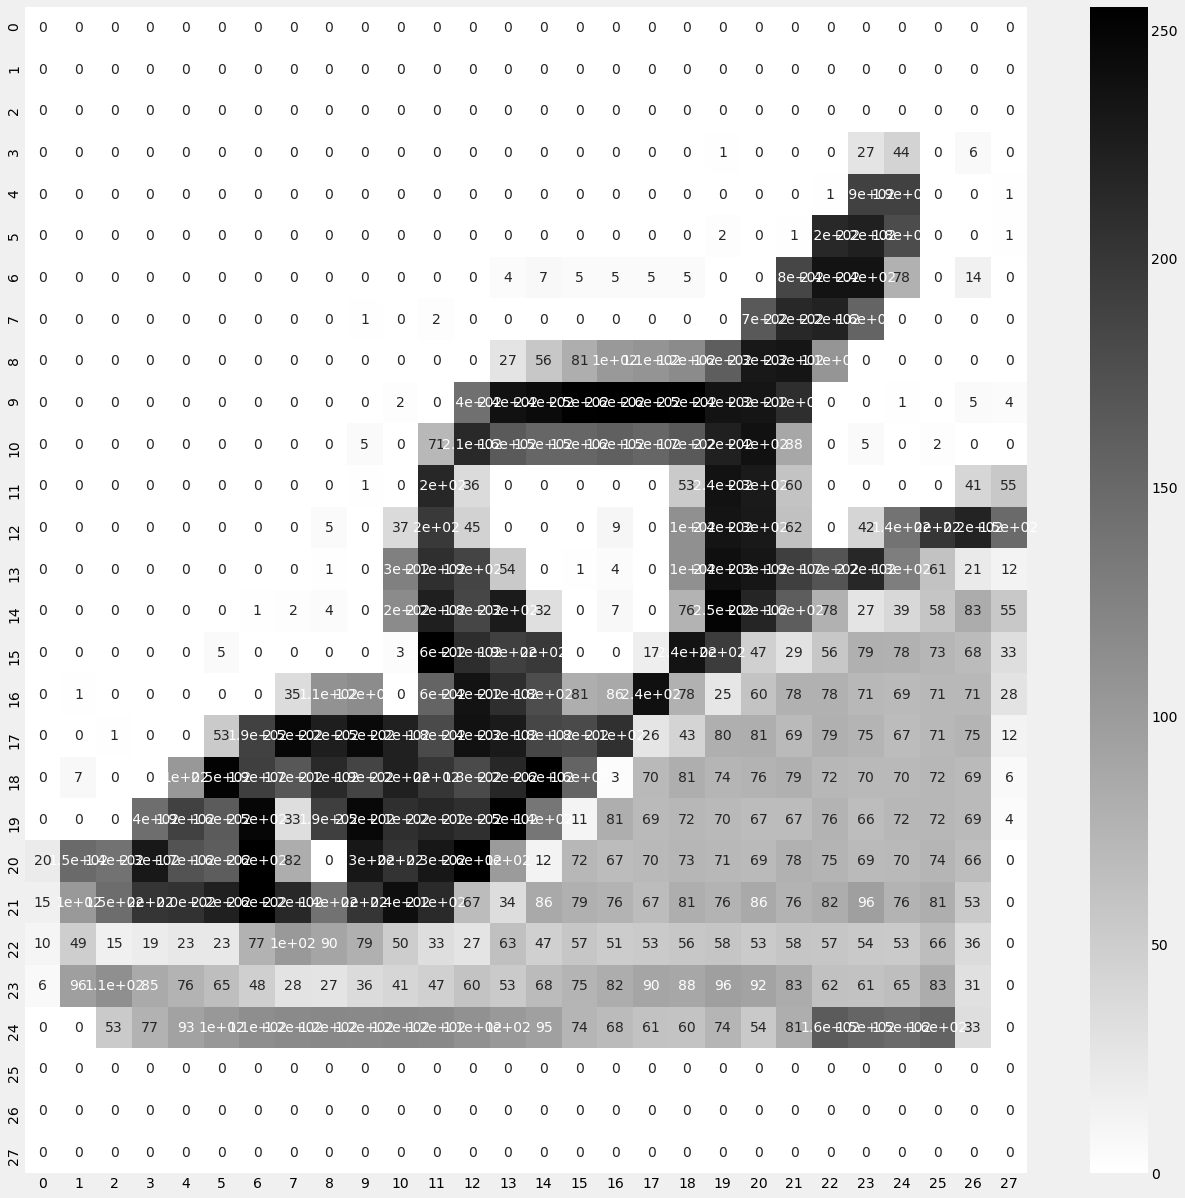

In [5]:
plt.subplots(figsize=(20,20))
sns.heatmap(x_train_images_full[np.random.randint(0,1000)], annot=True,cmap="binary")

In [7]:
x_train_val_images,x_train_images = x_train_images_full[0:4000]/255,x_train_images_full[4000:]/255
y_train_val_labels, y_train_labels = y_train_labels_full[0:4000],y_train_labels_full[4000:]
x_test_images_full = x_test_images_full/255

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.GaussianDropout(0.5))
model.add(tf.keras.layers.Dense(200,use_bias=False,activation="relu", kernel_initializer="he_uniform"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.GaussianDropout(0.5))
model.add(tf.keras.layers.Dense(300,use_bias=False,activation="relu", kernel_initializer="he_uniform"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.GaussianDropout(0.5))
model.add(tf.keras.layers.Dense(200,use_bias=False,activation="relu", kernel_initializer="he_uniform"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.GaussianDropout(0.5))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 784)               3136      
_________________________________________________________________
gaussian_dropout_4 (Gaussian (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               156800    
_________________________________________________________________
batch_normalization_5 (Batch (None, 200)               800       
_________________________________________________________________
gaussian_dropout_5 (Gaussian (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)              

In [14]:
model.compile("adam",loss="sparse_categorical_crossentropy", metrics="accuracy")

In [15]:
history = model.fit(x_train_images, y_train_labels, batch_size=64, epochs=100, verbose=1, validation_data=(x_train_val_images,y_train_val_labels))

Epoch 1/100
875/875 [==============================] - 24s 24ms/step - loss: 0.9296 - accuracy: 0.6730 - val_loss: 0.4914 - val_accuracy: 0.8205
Epoch 2/100
875/875 [==============================] - 19s 22ms/step - loss: 0.6213 - accuracy: 0.7766 - val_loss: 0.4242 - val_accuracy: 0.8422
Epoch 3/100
875/875 [==============================] - 19s 22ms/step - loss: 0.5720 - accuracy: 0.7939 - val_loss: 0.4030 - val_accuracy: 0.8553
Epoch 4/100
875/875 [==============================] - 19s 22ms/step - loss: 0.5381 - accuracy: 0.8048 - val_loss: 0.3876 - val_accuracy: 0.8572
Epoch 5/100
875/875 [==============================] - 19s 22ms/step - loss: 0.5268 - accuracy: 0.8087 - val_loss: 0.3794 - val_accuracy: 0.8602
Epoch 6/100
875/875 [==============================] - 19s 22ms/step - loss: 0.5091 - accuracy: 0.8132 - val_loss: 0.3782 - val_accuracy: 0.8608
Epoch 7/100
875/875 [==============================] - 20s 22ms/step - loss: 0.4970 - accuracy: 0.8200 - val_loss: 0.3685 - val_ac

In [16]:
model.evaluate(x_test_images_full, y_test_labels_full)

313/313 [==============================] - 2s 6ms/step - loss: 0.3156 - accuracy: 0.8840


[0.3156420588493347, 0.8840000033378601]

In [17]:
y_pred = model.predict(x_test_images_full)

In [18]:
history.history

{'loss': [0.92961186170578,
  0.6212957501411438,
  0.5720039010047913,
  0.5381202697753906,
  0.5267508029937744,
  0.5091258883476257,
  0.49695923924446106,
  0.4899281859397888,
  0.4800635576248169,
  0.47031521797180176,
  0.46354857087135315,
  0.46010246872901917,
  0.455963134765625,
  0.44756704568862915,
  0.44517773389816284,
  0.4426961839199066,
  0.43901097774505615,
  0.4347420930862427,
  0.4333753287792206,
  0.4299396872520447,
  0.42944273352622986,
  0.4275013506412506,
  0.4230963885784149,
  0.4198901355266571,
  0.4182298183441162,
  0.4215486943721771,
  0.416766494512558,
  0.41420918703079224,
  0.4134334623813629,
  0.4127834737300873,
  0.41075190901756287,
  0.40510475635528564,
  0.405929833650589,
  0.40889692306518555,
  0.4044870138168335,
  0.40019312500953674,
  0.400580495595932,
  0.40123194456100464,
  0.4052661061286926,
  0.4006236493587494,
  0.3993854522705078,
  0.4054403305053711,
  0.39679405093193054,
  0.3960316479206085,
  0.39633750915

<AxesSubplot:>

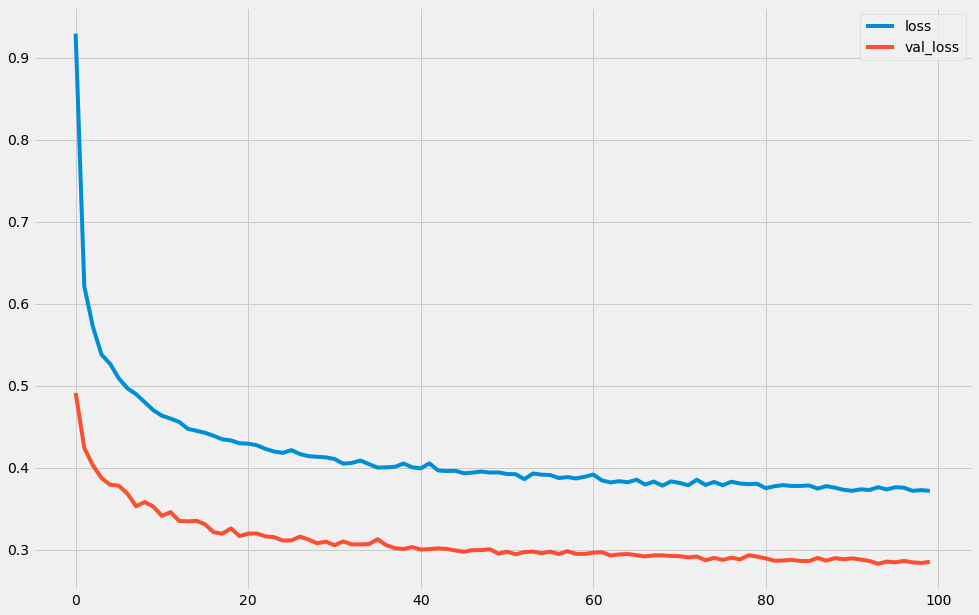

In [19]:
pd.DataFrame(history.history,columns=["loss","val_loss"]).plot(figsize=(15,10))

<AxesSubplot:>

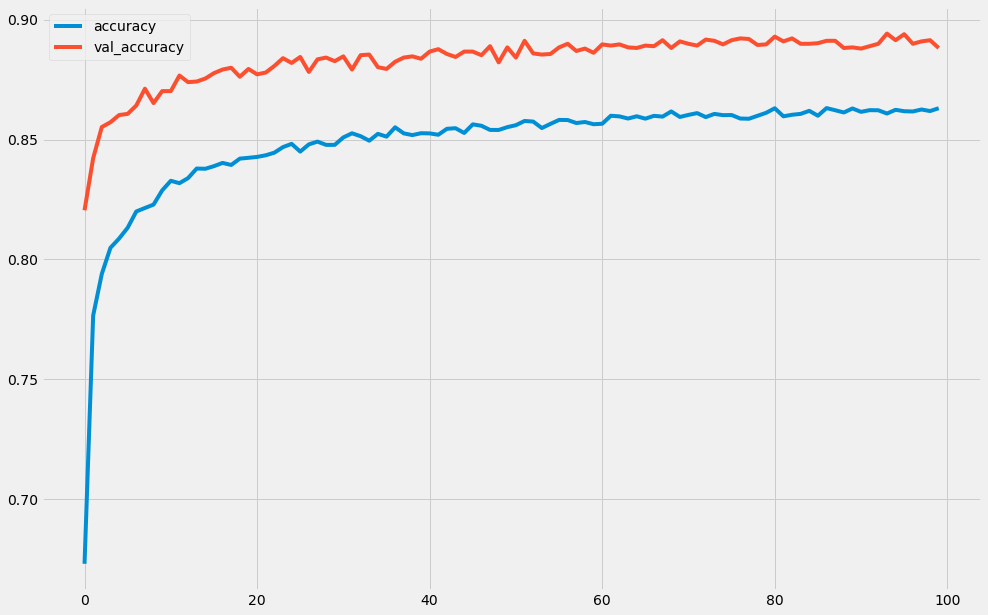

In [24]:
pd.DataFrame(history.history,columns=["accuracy","val_accuracy"]).plot(figsize=(15,10))

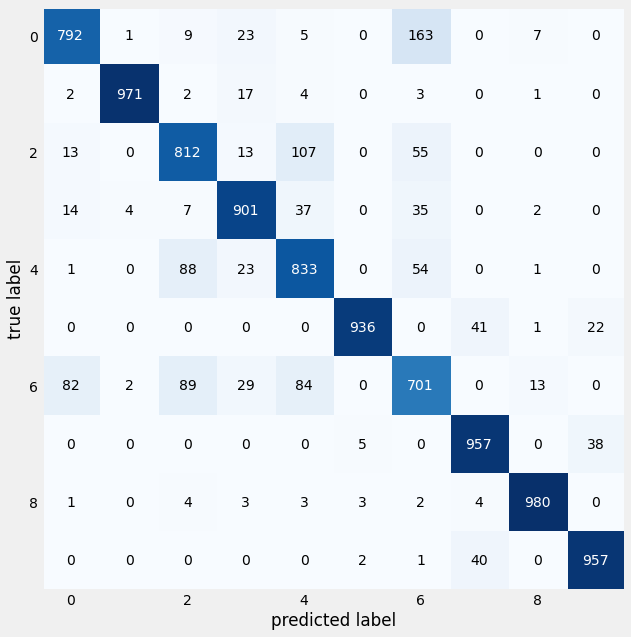

In [20]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test_labels_full, np.argmax(y_pred, axis=1))
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10, 10))
plt.show()

In [21]:
for i,j in zip(y_test_labels_full[0:50],np.around(model.predict(x_test_images_full)[0:50])):
    print(i,np.argmax(j), i==np.argmax(j))


9 9 True
2 2 True
1 1 True
1 1 True
6 6 True
1 1 True
4 4 True
6 6 True
5 5 True
7 7 True
4 4 True
5 5 True
7 5 False
3 3 True
4 4 True
1 1 True
2 2 True
4 0 False
8 8 True
0 0 True
2 2 True
5 7 False
7 7 True
9 5 False
1 1 True
4 2 False
6 6 True
0 0 True
9 9 True
3 0 False
8 8 True
8 8 True
3 3 True
3 3 True
8 8 True
0 0 True
7 7 True
5 5 True
7 7 True
9 9 True
6 0 False
1 1 True
3 6 False
7 9 False
6 6 True
7 7 True
2 2 True
1 1 True
2 2 True
2 6 False


In [25]:
model.save("transfer_model.h5")

# After Transfer Learning

In [42]:
load_model = tf.keras.models.load_model("transfer_model.h5")

In [8]:
np.round(load_model.predict(x_test_images_full))

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [43]:
# load_model.layers[2].get_config()
for i in load_model.layers[0:-1]:
    i.trainable= False

In [44]:
def update_even_odd_labels(labels):
    for idx, label in enumerate(labels):
        labels[idx] = np.where(label % 2 == 0, 1 , 0)
    return labels

In [77]:
y_train_labels_bin = update_even_odd_labels([y_train_labels])
y_train_val_labels_bin = update_even_odd_labels([y_train_val_labels])
y_test_labels_full_bin = update_even_odd_labels([y_test_labels_full])

In [45]:
y_train_labels_bin, y_train_val_labels_bin, y_test_labels_full_bin = update_even_odd_labels([y_train_labels, y_train_val_labels, y_test_labels_full])

In [57]:
y_train_labels_bin = np.asarray(y_train_labels_bin).astype('uint8')
y_train_val_labels_bin = np.asarray(y_train_val_labels_bin).astype('uint8')
y_test_labels_full_bin = np.asarray(y_test_labels_full_bin).astype('uint8')
np.unique(y_train_labels_bin)

array([0, 1], dtype=uint8)

In [9]:
y_test_labels_full_bin.shape

(10000,)

In [11]:
load_model.layers

In [46]:
new_model = tf.keras.models.Sequential(load_model.layers[:-1])

In [13]:
new_model.layers

In [47]:
new_model.add(tf.keras.layers.Dense(1,"sigmoid"))

In [32]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 784)               3136      
_________________________________________________________________
gaussian_dropout_4 (Gaussian (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               156800    
_________________________________________________________________
batch_normalization_5 (Batch (None, 200)               800       
_________________________________________________________________
gaussian_dropout_5 (Gaussian (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)              

In [48]:
new_model.compile("adam",loss="binary_crossentropy", metrics="accuracy")

In [49]:
calback  = tf.keras.callbacks.TensorBoard("transfer_model_logs/")
# stopping = tf.keras.callbacks.EarlyStopping(patience=3,verbose=1,restore_best_weights=True)
check_point = tf.keras.callbacks.ModelCheckpoint("check_points/",verbose=1,save_best_only=True)
ACCURACY_THRESHOLD = 0.955
class CustomCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None): 
#         if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
#             print(f"\nReached {logs.get('accuracy')}'>'{ACCURACY_THRESHOLD*100} accuracy, so stopping training!!")   
#             self.model.stop_training = True
    def on_train_batch_end(self, epoch, logs=None): 
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
            print(f"\nReached {logs.get('accuracy')}'>'{ACCURACY_THRESHOLD*100} accuracy, so stopping training!!")   
            self.model.stop_training = True   

In [129]:
help(tf.keras.callbacks.ModelCheckpoint)

Help on class ModelCheckpoint in module tensorflow.python.keras.callbacks:

class ModelCheckpoint(Callback)
 |  ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch', options=None, **kwargs)
 |  
 |  Callback to save the Keras model or model weights at some frequency.
 |  
 |  `ModelCheckpoint` callback is used in conjunction with training using
 |  `model.fit()` to save a model or weights (in a checkpoint file) at some
 |  interval, so the model or weights can be loaded later to continue the training
 |  from the state saved.
 |  
 |  A few options this callback provides include:
 |  
 |  - Whether to only keep the model that has achieved the "best performance" so
 |    far, or whether to save the model at the end of every epoch regardless of
 |    performance.
 |  - Definition of 'best'; which quantity to monitor and whether it should be
 |    maximized or minimized.
 |  - The frequency it should save at

In [50]:
new_history = new_model.fit(x_train_images, y_train_labels_bin, batch_size=64, epochs=100, verbose=1, 
                            validation_data=(x_train_val_images,y_train_val_labels_bin),
                            callbacks=[CustomCallback(),calback,check_point])

Epoch 1/100
875/875 [==============================] - 14s 14ms/step - loss: 0.1879 - accuracy: 0.9458 - val_loss: 0.0680 - val_accuracy: 0.9785

Epoch 00001: val_loss improved from inf to 0.06803, saving model to check_points/
INFO:tensorflow:Assets written to: check_points/assets
Epoch 2/100
  1/875 [..............................] - ETA: 7s - loss: 0.1329 - accuracy: 0.9531
Reached 0.96875'>'95.5 accuracy, so stopping training!!
875/875 [==============================] - 0s 484us/step - loss: 0.1151 - accuracy: 0.9688 - val_loss: 0.0680 - val_accuracy: 0.9785

Epoch 00002: val_loss improved from 0.06803 to 0.06799, saving model to check_points/
INFO:tensorflow:Assets written to: check_points/assets


In [51]:
new_model.evaluate(x_test_images_full, y_test_labels_full_bin)
# x_test_images_full.shape,y_test_labels_full_bin.shape

313/313 [==============================] - 2s 7ms/step - loss: 0.0725 - accuracy: 0.9763


[0.0725114569067955, 0.9763000011444092]

In [24]:
y_test_labels_full_bin

array([0, 1, 0, ..., 1, 0, 0])

In [52]:
%load_ext tensorboard
%tensorboard --logdir transfer_model_logs

Reusing TensorBoard on port 6006 (pid 3996), started 1:14:39 ago. (Use '!kill 3996' to kill it.)

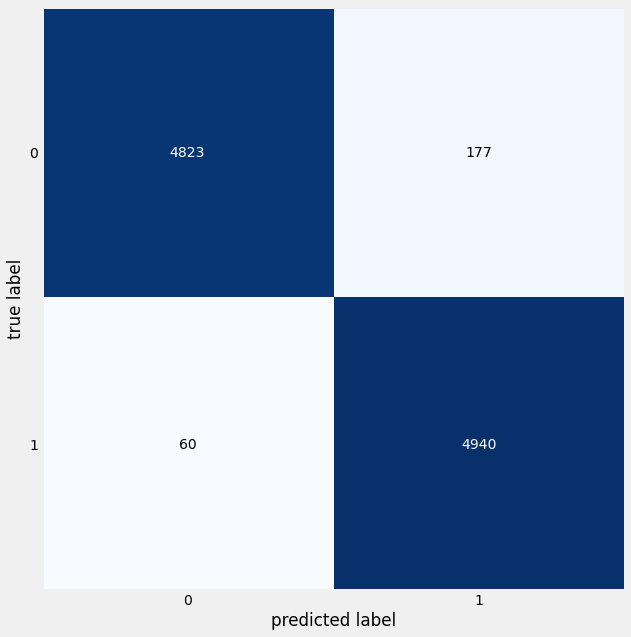

In [53]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test_labels_full_bin, np.round(new_model.predict(x_test_images_full)))
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10, 10))
plt.show()
# confusion_matrix(y_test_labels_full_bin, np.round(new_model.predict(x_test_images_full)))
# np.round(new_model.predict(x_test_images_full))

In [99]:
x_test_images_full.shape

(10000, 28, 28)

In [39]:
for i,j in zip(y_test_labels_full_bin[0:100],np.around(new_model.predict(x_test_images_full)[0:100])):
    print(i,int(j[0]), i==j)


0 0 [ True]
1 1 [ True]
0 0 [ True]
0 0 [ True]
1 1 [ True]
0 0 [ True]
1 1 [ True]
1 1 [ True]
0 0 [ True]
0 0 [ True]
1 1 [ True]
0 0 [ True]
0 0 [ True]
0 0 [ True]
1 1 [ True]
0 0 [ True]
1 1 [ True]
1 1 [ True]
1 1 [ True]
1 1 [ True]
1 1 [ True]
0 0 [ True]
0 0 [ True]
0 0 [ True]
0 0 [ True]
1 1 [ True]
1 1 [ True]
1 1 [ True]
0 0 [ True]
0 1 [False]
1 1 [ True]
1 1 [ True]
0 0 [ True]
0 0 [ True]
1 1 [ True]
1 1 [ True]
0 0 [ True]
0 0 [ True]
0 0 [ True]
0 0 [ True]
1 1 [ True]
0 0 [ True]
0 1 [False]
0 0 [ True]
1 1 [ True]
0 0 [ True]
1 1 [ True]
0 0 [ True]
1 1 [ True]
1 1 [ True]
1 1 [ True]
1 1 [ True]
0 0 [ True]
1 1 [ True]
1 1 [ True]
1 1 [ True]
1 1 [ True]
1 1 [ True]
1 1 [ True]
1 1 [ True]
0 0 [ True]
0 0 [ True]
1 1 [ True]
0 0 [ True]
0 0 [ True]
0 0 [ True]
1 1 [ True]
0 0 [ True]
0 0 [ True]
1 1 [ True]
0 0 [ True]
1 1 [ True]
1 1 [ True]
1 1 [ True]
1 1 [ True]
0 0 [ True]
0 0 [ True]
1 1 [ True]
1 1 [ True]
1 1 [ True]
0 0 [ True]
1 1 [ True]
0 0 [ True]
0 0 

In [45]:
np.round(new_model.predict(x_test_images_full))

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

<AxesSubplot:>

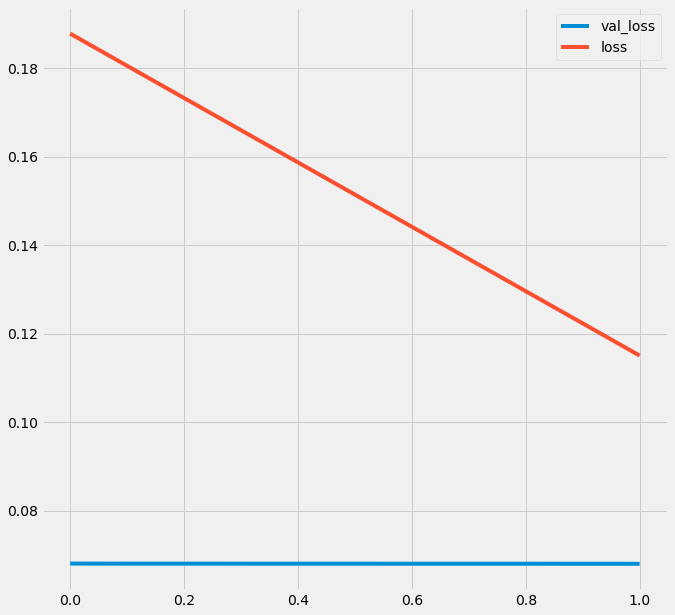

In [54]:
pd.DataFrame(new_history.history,columns=["val_loss","loss"]).plot(figsize=(10,10))

## Observation:

    After transfer learning model is faster than before transfer learning model
    
    It Reduces the save time. and fast converging

# Conclusion:

* Before transfer learning model during training accuracy is  accuracy: 0.866, val_accuracy: val_accuracy: 0.8858


* After transfer learning model during training accuracy is  accuracy: accuracy: 0.9527, val_accuracy: val_accuracy: 0.9650